# New York Taxi Trips

El objetivo de esta prueba es predecir la duración de los viajes en taxi en la ciudad de New York.

El desarrollo se dividirá en:

1. Pre Procesamiento de Datos
2. Analisis exploratorio de datos
3. Creación del Modelo

## 1. Pre Procesamiento de Datos

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
df = pd.read_csv('1. New york Taxi.csv')
df.shape

(1458644, 11)

In [35]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [36]:
#Verificando atributos, tipo de dato y valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [37]:
#Verificando duplicados
Duplicated_Row = df[df.duplicated()]
print(Duplicated_Row)

Empty DataFrame
Columns: [id, vendor_id, pickup_datetime, dropoff_datetime, passenger_count, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, store_and_fwd_flag, trip_duration]
Index: []


In [38]:
#Valores unicos de cada atributo
df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

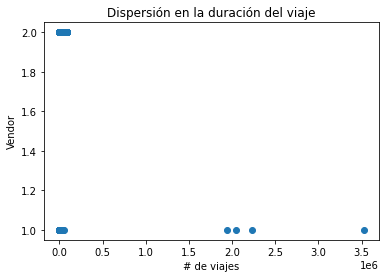

In [39]:
#Verificando outliers en la variablle 'trip_duration' graficando su dispersion respecto 'vendor_id'
plt.figure(figsize=(6,4))
plt.scatter(df['trip_duration'],(df['vendor_id']))
plt.title('Dispersión en la duración del viaje')
plt.xlabel('# de viajes')
plt.ylabel('Vendor')
plt.show()

In [40]:
#Eliminando outliers de 'trip_duration'
df = df[df['trip_duration']<500000]

<AxesSubplot:xlabel='pickup_latitude'>

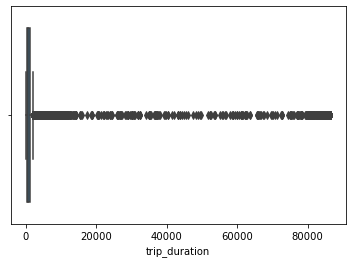

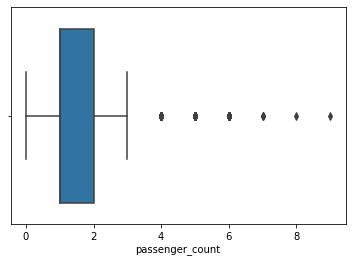

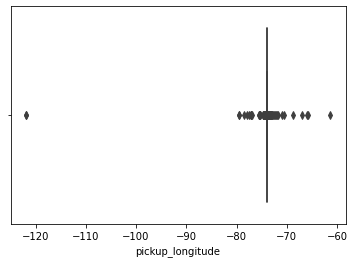

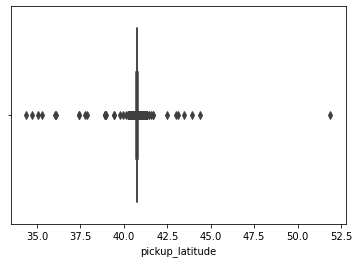

In [41]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['trip_duration'])

plt.figure(figsize=(6,4))
sns.boxplot(x=df["passenger_count"])

plt.figure(figsize=(6,4))
sns.boxplot(x=df["pickup_longitude"])

plt.figure(figsize=(6,4))
sns.boxplot(x=df["pickup_latitude"])

In [42]:
#Eliminando outliers de 'trip duration' v2
df = df[df['trip_duration']<20000]

#Eliminando outliers de 'passenger_count'
df = df[df['passenger_count']>0]
df = df[df['passenger_count']<7]

#Eliminando outliers de 'pickup/dropoff longitude'
df = df[df['pickup_longitude']>-80]
df = df[df['dropoff_longitude']<-70]
    
#Eliminando outliers de 'pickup/dropoff Latitude'
df = df[df['pickup_latitude']>37.5]
df = df[df['dropoff_latitude']<44.5]

In [43]:
#Convierte 'pickup_datetime' y 'dropoff_datetime' en tipo datetime
import warnings
warnings.filterwarnings("ignore")
df['pickup_datetime']=pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime']=pd.to_datetime(df.dropoff_datetime)

#Codificando variables categoricas
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'N':0,'Y':1})

In [44]:
#Separando los timestamps

#Pick up
df['pickup_hour'] = df['pickup_datetime'].dt.hour #Hora del dia
df['pickup_month'] = df['pickup_datetime'].dt.month #Mes
df['pickup_dayofmonth'] = df['pickup_datetime'].dt.day #Dia del mes
df['pickup_dayofweek'] = df['pickup_datetime'].dt.dayofweek #Dia de la semana
df.drop(['pickup_datetime'], axis = 1, inplace = True) #Elimina columna 'pickup_datetime'

#Drop off
df.drop(['dropoff_datetime'], axis = 1, inplace = True) #Elimina columna 'dropoff_datetime'

## 2. Analisis exploratorio de datos

In [45]:
#Estudiando la variable objetivo
target = df['trip_duration']
print("El tiempo promedio de viaje fue ",round((np.mean(target.values)/60.0),1)," minutos.")
print("El viaje más corto fue de ",round((np.min(target.values)),1)," segundo.")
print("El viaje más largo fue de ",round((np.max(target.values)/3600.0),1)," horas.")

El tiempo promedio de viaje fue  14.0  minutos.
El viaje más corto fue de  1  segundo.
El viaje más largo fue de  5.2  horas.


<AxesSubplot:xlabel='trip_duration', ylabel='Density'>

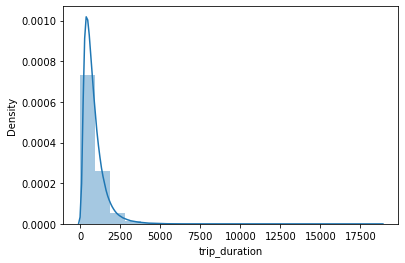

In [46]:
#Histograma de 'trip_duration'
bins=20
sns.distplot(df['trip_duration'],bins)

<AxesSubplot:xlabel='pickup_hour', ylabel='count'>

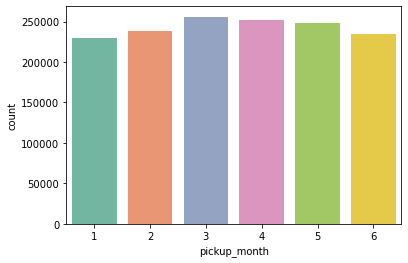

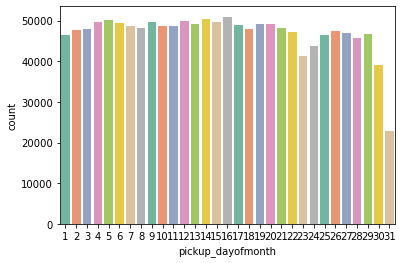

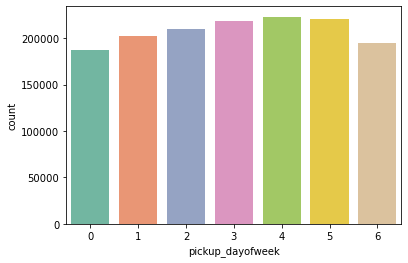

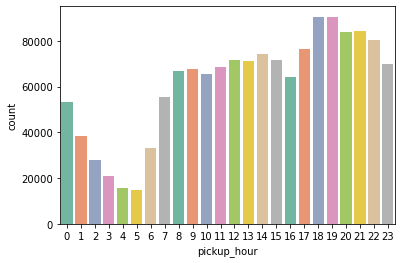

In [47]:
#Graficando viajes por mes - dia del mes - dia de la semana -hora del dia
plt.figure(figsize=(6,4))
sns.countplot(x=df['pickup_month'], palette="Set2")

plt.figure(figsize=(6,4))
sns.countplot(x=df['pickup_dayofmonth'], palette="Set2")

plt.figure(figsize=(6,4))
sns.countplot(x=df['pickup_dayofweek'], palette="Set2")

plt.figure(figsize=(6,4))
sns.countplot(x=df['pickup_hour'], palette="Set2")

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

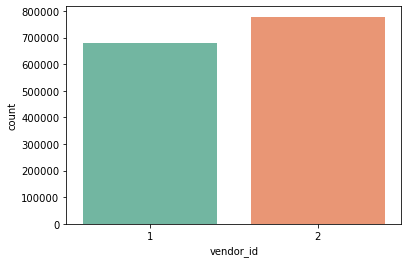

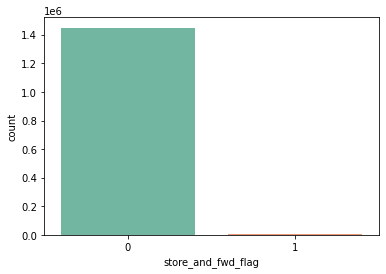

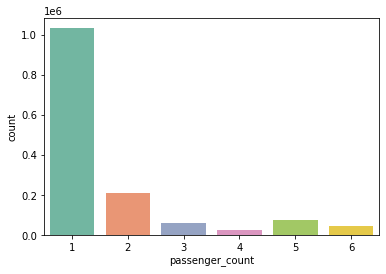

In [48]:
#Distribucion variable 'vendor_id'
plt.figure(figsize=(6,4))
sns.countplot(x=df['vendor_id'], palette="Set2")

#Distribucion variable 'store_and_fwd_flag'
plt.figure(figsize=(6,4))
sns.countplot(x=df['store_and_fwd_flag'], palette="Set2")


#Numero de pasajeros por viaje
plt.figure(figsize=(6,4))
sns.countplot(x=df['passenger_count'], palette="Set2")

<AxesSubplot:>

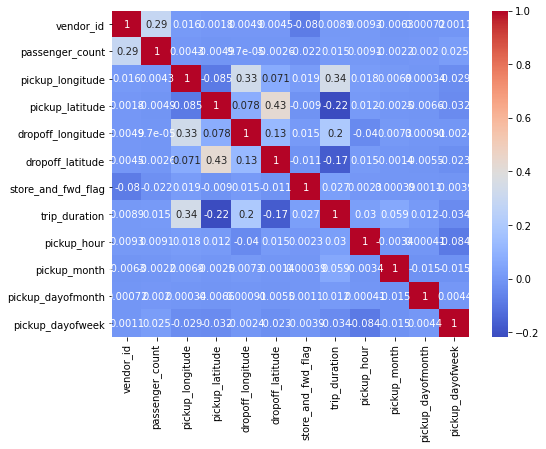

In [49]:
#Mapa de calor de correlación entre variables

Correlation = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(Correlation, annot=True, cmap='coolwarm')

## 3. Creación del Modelo

In [50]:
#Moviendo la variable target al final
df1 = df.pop('trip_duration')
df['trip_duration']=df1

#Separando la variable target
independiente=df.iloc[0:,1:12].values
dependiente=df.iloc[0:,12:].values

In [51]:
#Dividiendo train/test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independiente,dependiente,test_size=0.2)

In [52]:
#Modelo de regresión linear
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
y_pred_reg = reg.predict(x_test)

In [53]:
from sklearn import metrics
print("El coeficiente R^2 del modelo linear es ",reg.score(x_test,y_test))
print('El error absoluto medio es :',metrics.mean_absolute_error(y_test,y_pred_reg))
print('El error cuadratico medio:',metrics.mean_squared_error(y_test,y_pred_reg))
print('La raíz del error cuadratico medio: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred_reg)))

El coeficiente R^2 del modelo linear es  0.20167832082836523
El error absoluto medio es : 422.9088649632357
El error cuadratico medio: 351133.6606141223
La raíz del error cuadratico medio:  592.5653218119689


In [54]:
# Modelo Random Forest
from sklearn.ensemble import RandomForestRegressor 
rforest = RandomForestRegressor(n_estimators = 10, random_state = 0)
rforest = rforest.fit(x_train,y_train)
y_pred_rforest = rforest.predict(x_test)

In [55]:
R2_rforest=metrics.r2_score(y_test, y_pred_rforest)
print("El coeficiente R^2 del modelo random forest es ",R2_rforest)
print('El error absoluto medio es :',metrics.mean_absolute_error(y_test,y_pred_rforest))
print('El error cuadratico medio:',metrics.mean_squared_error(y_test,y_pred_rforest))
print('La raíz del error cuadratico medio: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred_rforest)))

El coeficiente R^2 del modelo random forest es  0.7689977591887406
El error absoluto medio es : 194.328946742373
El error cuadratico medio: 101603.98313407664
La raíz del error cuadratico medio:  318.75379705044554


In [56]:
# Modelo Arbol de Decisión
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor().fit(x_train,y_train)
y_pred_dtree = dtree.predict(x_test)

In [57]:
R2_dtree=metrics.r2_score(y_test, y_pred_dtree)
print("El coeficiente R^2 del modelo random forest es ",R2_dtree)
print('El error absoluto medio es :',metrics.mean_absolute_error(y_test,y_pred_dtree))
print('El error cuadratico medio:',metrics.mean_squared_error(y_test,y_pred_dtree))
print('La raíz del error cuadratico medio: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred_dtree)))

El coeficiente R^2 del modelo random forest es  0.5698864798227621
El error absoluto medio es : 263.26704508395096
El error cuadratico medio: 189181.0516484667
La raíz del error cuadratico medio:  434.9494817199656


De acuerdo a las métricas de los modelos evaluados, el modelo que mejor se ajusta a los datos y con menor error cuadratico medio es Random Forest

In [58]:
#Imprime set de predicciones
y_pred_rforest

array([ 807.8, 1607.1,  746.2, ...,  265.3,  250.7,  605.5])